<a href="https://colab.research.google.com/github/pdrzxzz/risk-score-praso/blob/main/risk_score_praso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📥 Importing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re

# 🔄 Fetch data

In [ ]:
df = pd.read_csv('praso-data.csv')

# 👁️ Glance of data

In [ ]:
df.sample(5)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_credores,serasa_socio_tem_negativacao,ifood_contagem_avaliacoes,ifood_faixa_preco,google_maps_avaliacao,google_maps_contagem_avaliacoes,google_maps_tem_website,inadimplente
7103,AL,MACEIO,Hambúrguer,213-5 - Empresário (Individual),Fonte 5,56.11-2-01,Restaurantes e similares,"(3000, 5000]","(50, 100]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
12065,PB,BAYEUX,Mercearia & Mercado,213-5 - Empresário (Individual),Fonte 1,47.12-1-00,"Comércio varejista de mercadorias em geral, co...","(8000, 10000]","(5000, 8000]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
5902,AL,MACEIO,Mercearia & Mercado,213-5 - Empresário (Individual),Fonte 5,10.33-3-02,"Fabricação de sucos de frutas, hortaliças e le...","(8000, 10000]","(100, 150]",0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0
7003,AL,MACEIO,Pizza & Massas,213-5 - Empresário (Individual),Fonte 5,56.20-1-02,Serviços de alimentação para eventos e recepçõ...,"(200, 1000]","(100, 150]",0,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1
1935,PE,RECIFE,Restaurante Brasileiro,213-5 - Empresário (Individual),Fonte 2,56.20-1-04,Fornecimento de alimentos preparados preponder...,"(8000, 10000]","(450, 600]",0,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]:,} columns.")

The dataset contains 12,458 rows and 20 columns.


In [ ]:
# Fonts
df.value_counts('natureza_juridica').head(10)

,count
natureza_juridica,
213-5 - Empresário (Individual),9911
206-2 - Sociedade Empresária Limitada,2490
230-5 - Empresa Individual de Responsabilidade Limitada (de Natureza Empresária),26
205-4 - Sociedade Anônima Fechada,16
223-2 - Sociedade Simples Pura,4
224-0 - Sociedade Simples Limitada,4
204-6 - Sociedade Anônima Aberta,2
232-1 - Sociedade Unipessoal de Advocacia,2
203-8 - Sociedade de Economia Mista,1


In [ ]:
# Fonts
df.value_counts('fonte_cliente').head(10)

,count
fonte_cliente,
Fonte 1,4524
Fonte 5,3937
Fonte 2,3361
Fonte 4,387
Fonte 3,249


In [ ]:
# 10 cities with more costumers
df.value_counts('municipio').head(10)

,count
municipio,
FORTALEZA,2723
RECIFE,2213
JOAO PESSOA,1251
MACEIO,1137
JABOATAO DOS GUARARAPES,673
OLINDA,502
PAULISTA,402
CARUARU,361
CAUCAIA,294


In [ ]:
# States with more costumers
df.value_counts('uf').head(10)

,count
uf,
PE,5641
CE,3949
PB,1631
AL,1237


In [ ]:
# States with more costumers
df.value_counts('segmento_cliente').head(10)

,count
segmento_cliente,
Restaurante Brasileiro,2825
Mercearia & Mercado,1676
Doces & Confeitaria,1645
Lanches & Salgados,1558
Padaria,744
Pizza & Massas,703
Hambúrguer,459
Bar,421
Distribuidor,342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12458 entries, 0 to 12457
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                12458 non-null  object 
 1   municipio                         12458 non-null  object 
 2   segmento_cliente                  12458 non-null  object 
 3   natureza_juridica                 12458 non-null  object 
 4   fonte_cliente                     12458 non-null  object 
 5   cnae_codigo                       12458 non-null  object 
 6   cnae_descricao                    12458 non-null  object 
 7   capital_social                    12458 non-null  object 
 8   idade_cnpj                        12458 non-null  object 
 9   serasa_contagem_negativacoes      12458 non-null  int64  
 10  serasa_contagem_protestos         12458 non-null  int64  
 11  serasa_idade_divida_mais_recente  2356 non-null   float64
 12  sera

In [ ]:
df.describe()

,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_idade_divida_mais_recente,serasa_socio_tem_negativacao,google_maps_tem_website,inadimplente
count,12458.000000,12458.000000,2356.000000,12458.000000,1038.0,12458.000000
mean,0.942447,1.034596,14.536927,0.480334,1.0,0.409697
std,11.040111,62.842488,14.169609,0.499633,0.0,0.491797
min,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
25%,0.000000,0.000000,3.000000,0.000000,1.0,0.000000
50%,0.000000,0.000000,9.000000,0.000000,1.0,0.000000
75%,0.000000,0.000000,21.000000,1.000000,1.0,1.000000
max,912.000000,6917.000000,60.000000,1.000000,1.0,1.000000


# 🧹 Data Cleaning

## ❓ Null values?

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
ifood_contagem_avaliacoes,11978
ifood_faixa_preco,11604
google_maps_avaliacao,11593
google_maps_contagem_avaliacoes,11420
google_maps_tem_website,11420
serasa_credores,10483
serasa_idade_divida_mais_recente,10102
uf,0
natureza_juridica,0
segmento_cliente,0


In [ ]:
null_df = (df.isnull().sum()/len(df)*100).sort_values(ascending=True).reset_index()
x_axis_name = '% of null'
y_axis_name = 'column'
null_df = null_df.rename(columns={'index': y_axis_name, 0: x_axis_name})
fig = px.bar(null_df, x=x_axis_name, y=y_axis_name, orientation='h')
fig.update_layout(
    width=1200, height=500,
    margin=dict(t=100),
    title={
        'text': 'Null values per column (%)',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )
fig.show()

7 columns have at least 80% of null values,  
i will drop them because it will simplifiy a lot,  
we might test with them later.

In [ ]:
df = df.dropna(axis=1)
df.shape

(12458, 13)

In [ ]:
null_df = (df.isnull().sum()/len(df)*100).sort_values(ascending=True).reset_index()
x_axis_name = '% of null'
y_axis_name = 'column'
null_df = null_df.rename(columns={'index': y_axis_name, 0: x_axis_name})
fig = px.bar(null_df, x=x_axis_name, y=y_axis_name, orientation='h')
fig.update_layout(
    width=1200, height=500,
    margin=dict(t=100),
    title={
        'text': 'Null values per column (%)',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )
fig.show()

In [ ]:
df.isna().sum().sum()

np.int64(0)

## 2️⃣ Any duplicated rows?

In [ ]:
df.duplicated().sum()

np.int64(172)

In [ ]:
df[df.duplicated(keep=False) & (df['segmento_cliente'] == 'Bar')]

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,cnae_descricao,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_socio_tem_negativacao,inadimplente
1238,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 2,56.11-2-04,Bares e outros estabelecimentos especializados...,"(5000, 8000]","(900, 1150]",0,0,0,0
4796,CE,FORTALEZA,Bar,213-5 - Empresário (Individual),Fonte 2,56.11-2-04,Bares e outros estabelecimentos especializados...,"(5000, 8000]","(900, 1150]",0,0,0,0
7712,AL,MACEIO,Bar,213-5 - Empresário (Individual),Fonte 5,56.11-2-04,Bares e outros estabelecimentos especializados...,"(0, 1]","(4000, 5000]",0,0,0,0
11501,AL,MACEIO,Bar,213-5 - Empresário (Individual),Fonte 5,56.11-2-04,Bares e outros estabelecimentos especializados...,"(0, 1]","(4000, 5000]",0,0,0,0


We have duplicated rows, but it's fine.

Duplicated rows are different costumers with the same profile,   
which can be useful to strength the statistical signal of that profile in the model.

## ⏸️ Columns with same info?

In [ ]:
df['cnae_descricao'].value_counts()

,count
cnae_descricao,
Restaurantes e similares,2226
"Lanchonetes, casas de chá, de sucos e similares",1827
"Comércio varejista de mercadorias em geral, com predominância de produtos alimentícios - minimercados, mercearias e armazéns",1204
Fornecimento de alimentos preparados preponderantemente para consumo domiciliar,1162
Fabricação de produtos de padaria e confeitaria com predominância de produção própria,876
...,...
Comércio atacadista de cacau,1
Representantes comerciais e agentes do comércio de peças e acessórios novos e usados para veículos automotores,1
Compra e venda de imóveis próprios,1


In [ ]:
df['cnae_codigo'].value_counts()

,count
cnae_codigo,
56.11-2-01,2226
56.11-2-03,1827
47.12-1-00,1204
56.20-1-04,1162
10.91-1-02,876
...,...
46.23-1-05,1
45.30-7-06,1
68.10-2-01,1


There columns are determined by each other so we must drop one of them.

In [ ]:
df = df.drop(columns=['cnae_descricao'])

## 🔤 Columns dtype conversion

### ❇️ Auxiliary conversion function

In [ ]:
def interval_to_mean(val):
    """
    Calculate the mean of two numbers in a string interval like '(1.5, 3.0]'.

    If input is not a string, return it unchanged.
    """

    # If the value is not a string (e.g. it's NaN), return it as-is
    if not isinstance(val, str):
        return val  # keep NaN

    # Use regular expression to extract the two numbers from the interval string
    match = re.search(r'\(?([\d\.]+),\s*([\d\.]+)\]?', val)

    if match:
        # Extract the lower and upper bounds as floats
        low = float(match.group(1))
        high = float(match.group(2))

        # Return the mean of the two bounds
        return (low + high) / 2

### Original data types

In [ ]:
df.dtypes

,0
uf,object
municipio,object
segmento_cliente,object
natureza_juridica,object
fonte_cliente,object
cnae_codigo,object
capital_social,object
idade_cnpj,object
serasa_contagem_negativacoes,int64
serasa_contagem_protestos,int64


### Execute conversions

In [ ]:
df['uf'] = df['uf'].astype('category')

threshold = 20 # Cities with less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on city feature.
counts = df['municipio'].value_counts()
mask = df['municipio'].isin(counts[counts > threshold].index)
df['municipio'] = df['municipio'].where(mask, other='Other')
df['municipio'] = df['municipio'].astype('category')

df['segmento_cliente'] = df['segmento_cliente'].astype('category')

threshold = 30 #  natureza_juridica unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on natureza_juridica feature.
counts = df['natureza_juridica'].value_counts()
mask = df['natureza_juridica'].isin(counts[counts > threshold].index)
df['natureza_juridica'] = df['natureza_juridica'].where(mask, other='Other')
df['natureza_juridica'] = df['natureza_juridica'].apply(lambda x: x[:5]).astype('category')

df['fonte_cliente'] = df['fonte_cliente'].astype('category')

threshold = 5 #  cnae_codigo unique values that have less than threshold companies would be on "Other" category.
#                This threshold is made to prevent model overfitting on cnae_codigo feature.
counts = df['cnae_codigo'].value_counts()
mask = df['cnae_codigo'].isin(counts[counts > threshold].index)
df['cnae_codigo'] = df['cnae_codigo'].where(mask, other='Other')
df['cnae_codigo'] = df['cnae_codigo'].astype('category')

df['capital_social'] = df['capital_social'].apply(interval_to_mean)
df['idade_cnpj'] = df['idade_cnpj'].apply(interval_to_mean)

df['serasa_socio_tem_negativacao'] = df['serasa_socio_tem_negativacao'].astype('int8')
df['inadimplente'] = df['inadimplente'].astype('int8')

### These columns were dropped (that's why this code is commented) ###
# These columns above are treated preserving their NaNs:
# df['serasa_idade_divida_mais_recente'] = df['serasa_idade_divida_mais_recente'].astype('Int64') # Int64 supports NaN
# df['serasa_credores'] = df['serasa_credores'].str.split(',\s*').str[0]
# df['ifood_contagem_avaliacoes'] = df['ifood_contagem_avaliacoes'].apply(interval_to_mean)
# df['ifood_faixa_preco'] = df['ifood_faixa_preco'].apply(lambda x: len(str(x)) if pd.notnull(x) else pd.NA).astype('Int64') # Int64 supports NaN
# df['google_maps_avaliacao'] = df['google_maps_avaliacao'].apply(interval_to_mean)
# df['google_maps_contagem_avaliacoes'] = df['google_maps_contagem_avaliacoes'].apply(interval_to_mean)
# df['google_maps_tem_website'] = df['google_maps_tem_website'].fillna(0).astype('int')

### Adjusted data types

In [ ]:
df.dtypes

,0
uf,category
municipio,category
segmento_cliente,category
natureza_juridica,category
fonte_cliente,category
cnae_codigo,category
capital_social,float64
idade_cnpj,float64
serasa_contagem_negativacoes,int64
serasa_contagem_protestos,int64


In [ ]:
df.sample(5)

,uf,municipio,segmento_cliente,natureza_juridica,fonte_cliente,cnae_codigo,capital_social,idade_cnpj,serasa_contagem_negativacoes,serasa_contagem_protestos,serasa_socio_tem_negativacao,inadimplente
10359,CE,FORTALEZA,Restaurante Brasileiro,206-2,Fonte 5,56.11-2-01,150000.0,6500.0,0,0,0,1
2664,PE,OLINDA,Hambúrguer,213-5,Fonte 2,56.20-1-03,600.0,675.0,0,0,1,0
10098,PE,RECIFE,Padaria,213-5,Fonte 1,47.21-1-02,40000.0,75.0,0,0,0,0
11800,CE,FORTALEZA,Mercearia & Mercado,213-5,Fonte 1,47.12-1-00,600.0,300.0,0,0,0,1
4294,CE,Other,Doces & Confeitaria,213-5,Fonte 4,85.99-6-99,600.0,675.0,0,0,1,1


## 🎯Target Distribution

In [ ]:
df['inadimplente'].value_counts(normalize=True)

,proportion
inadimplente,
0,0.590303
1,0.409697


In [ ]:
fig = px.pie(df['inadimplente'].value_counts().reset_index(), names='inadimplente', values='count', color='inadimplente')

fig.update_traces(
    textinfo='percent+label',
    textfont_size=18,
    textfont_color='white'
)

fig.update_layout(
    title={
        'text': 'Target Distribution',
        'x': 0.5,
        'font': {
            'size': 30,
            }
        }
    )

fig.show()

The target variable is imbalanced,  
with approximately 59% of the samples labeled as False and 41% labeled as True.  
It's a mild imbalance, so we won't worry about it for now.

# 📶 Ploting and Analysis (EDA)

In [ ]:
categorical_cols = ['uf', 'municipio', 'segmento_cliente', 'natureza_juridica', 'fonte_cliente', 'cnae_codigo']

def plot_categorical_column(df, col):
    # Step 1: Calculate default ratio for each category
    default_ratio = (
        df[df['inadimplente'] == True]
        .groupby(col, observed=True)
        .size() / df.groupby(col, observed=True).size()
    )


    # Step 2: Sort categories by default ratio descending
    sorted_categories = default_ratio.sort_values(ascending=False).index.tolist()

    # Step 3: Plot using sorted order
    fig = px.histogram(df, y=col, color='inadimplente',
                      barmode='stack',
                      barnorm='percent',
                      title=f'{col.capitalize()} vs Inadimplente',
                      category_orders={col: sorted_categories})

    fig.update_layout(
        hoverlabel=dict(bgcolor='black'),
        yaxis={'categoryorder':'array', 'categoryarray': sorted_categories},
        xaxis_title='Percentage (%)',
        yaxis_title='Municipio',
    )



    fig.update_layout(xaxis_title=col, yaxis_title='Percentage (%)', bargap=0.2)
    fig.show()

In [ ]:
plot_categorical_column(df, 'uf')

PE have the most inadimplente ratio with about 46%, followed by CE (39%), PB (35%) and AL (32%).

In [ ]:
plot_categorical_column(df, 'municipio')

In [ ]:
plot_categorical_column(df, 'segmento_cliente')

In [ ]:
plot_categorical_column(df, 'natureza_juridica')

In [ ]:
plot_categorical_column(df, 'fonte_cliente')

In [ ]:
plot_categorical_column(df, 'cnae_codigo')

In [ ]:
numerical_cols = ['capital_social', 'idade_cnpj', 'serasa_socio_tem_negativacao']
# No make sense plotting 'serasa_contagem_negativacoes', 'serasa_contagem_protestos' because it almost all 0.
for col in numerical_cols:
    plot_df = df.copy()

    if col == 'capital_social':
        plot_df = plot_df[plot_df['capital_social'] < 1e6]

    fig = px.histogram(plot_df, x=col, color='inadimplente')
    fig.update_layout(title=f'{col} Distribution by Inadimplente')
    fig.show()



In [ ]:
def plot_correlation_matrix(X_train, y_train, title_suffix=''):
    """
    Plot a correlation matrix between features and target.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (np.array): Training target.
    """
    df = X_train.copy()
    df['inadimplente'] = y_train.astype(int)  # Convert target to numeric

    correlation_matrix = df.corr()
    correlation_with_target = correlation_matrix['inadimplente'].sort_values(ascending=False)

    plt.figure(figsize=(20, 8))
    barplot = sns.barplot(
      x=correlation_with_target.values,
      y=correlation_with_target.index,
      hue=correlation_with_target.index,
      palette='Spectral',
      legend=False,
      orient='h'
    )

    plt.title(f'Feature Correlation with Target {title_suffix}', fontsize=16)
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Feature', fontsize=12)

    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

    sns.despine()
    plt.tight_layout()
    plt.show()

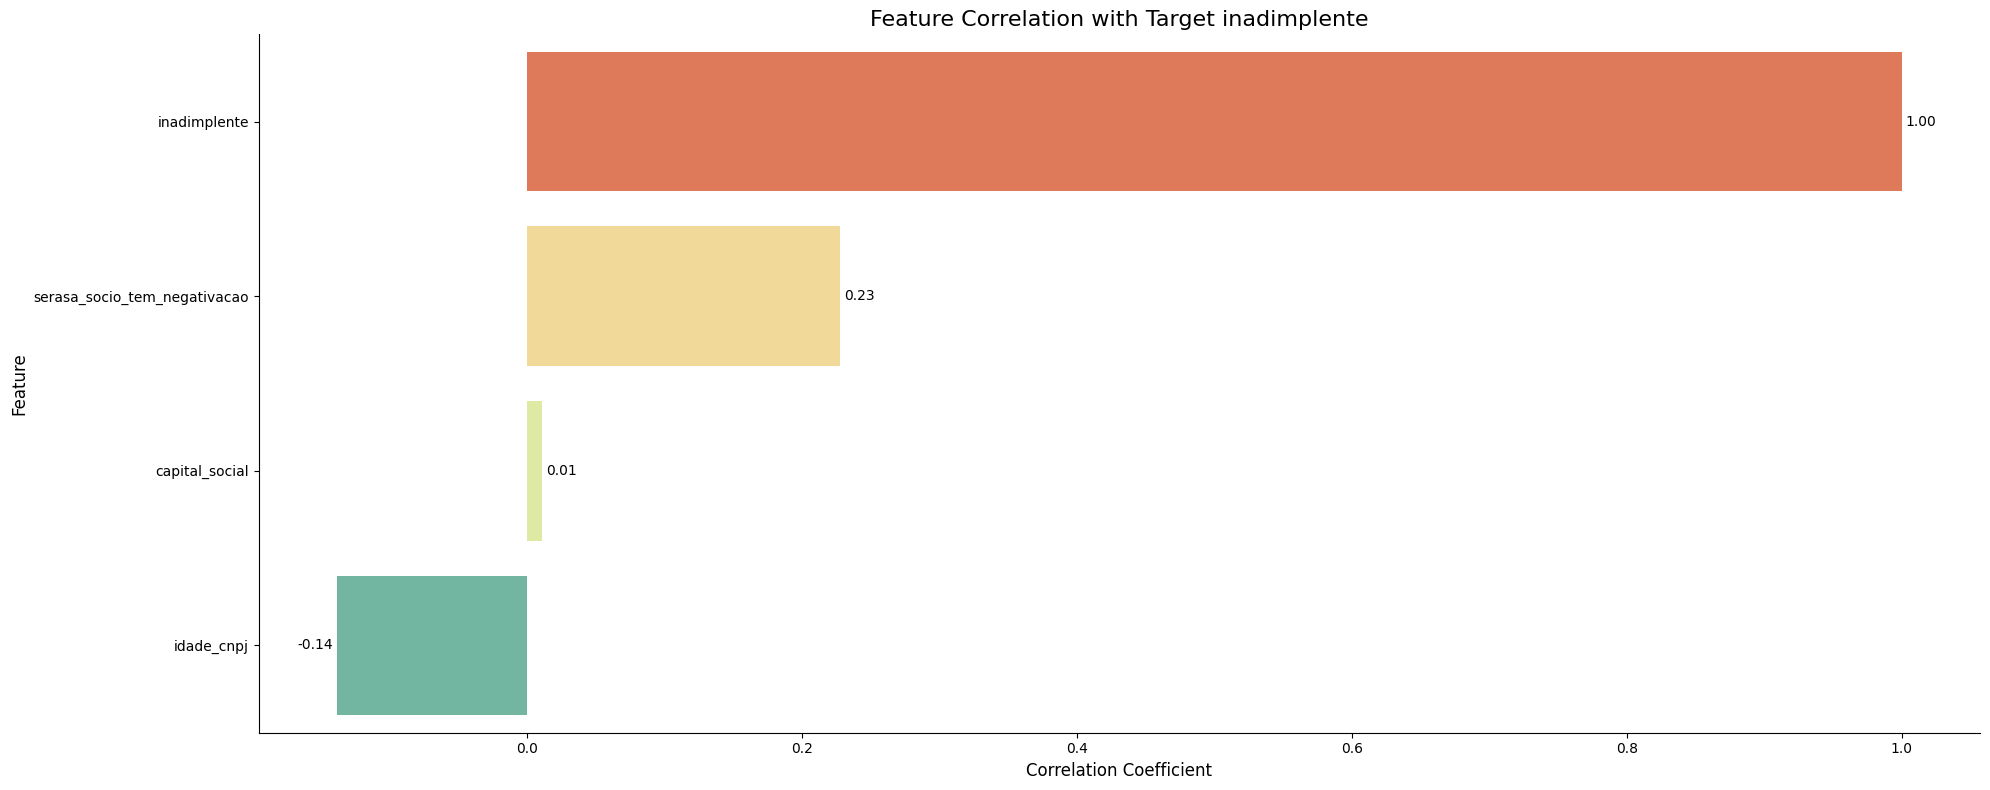

In [ ]:
plot_correlation_matrix(df[numerical_cols], df.iloc[:, -1:], title_suffix='inadimplente')